# Hierarchical Clustering to Determine Types of Iris Flowers

Clustering is an explorative technique that enables you to find groupings within your data, for example, how many types of iris flower there are. **Given a set of input data, clustering allows you to group your data such that members within the cluster are "more similar" compared to members outside of the cluster. This is an optimization problem.** As you find additional groupings that are salient for your data, you may use them as input to other machine learning models.

There are several clustering techniques. This sample uses hierarchical clustering. The hierarchical clustering algorithm, given n data points, is as follows:
- step 0: Start with n clusters, where each data point is in its own cluster
- step 1: Join clusters that are "most similar" to each other to form a new cluster
- Repeat until only one cluster is left



## The Iris flower data set

We will be using the [iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) for this sample. This data set contains the sepal length, sepal width, petal length, and petal width for three different iris flowers: setosa, versicolor, and verginica. For this sample, the clustering (which type of flower) has already been determined in advance, by a human specialist. This allows us to compare our clustering model with a known, human generated, clustering model. In general, the clusters will not be known in advance.

## Read the input data

The iris data set is already available in the seaborn python package.

In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

In [2]:
# Load the iris data set
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Review Human Generated Clusters

There are four features that can be used to determine the type of flower: sepal length, spal width, petal length, and petal width.  We can make a splom plot, which is a 4x4 array of scatter plots for each feature. At the diagonal is the histogram for that feature. Looking at the data, it is clear that the petal length and petal width is a good predictor for the sentosa flower. However, there is no easy way to distinguish all three flowers using a single variable. 

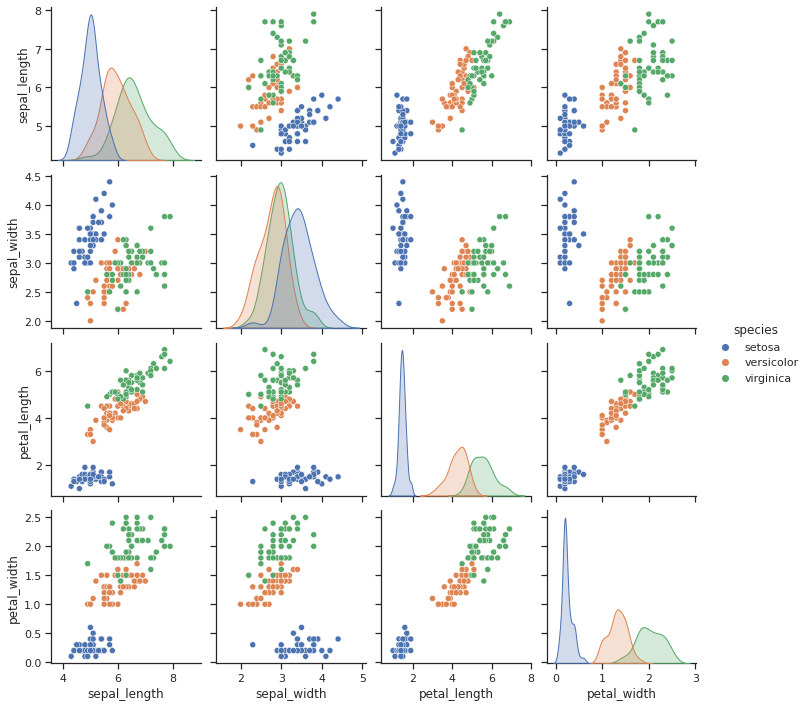

In [3]:
sns.set_theme(style="ticks")
sns.pairplot(iris, hue="species")
plt.show()

## Explore 3-Cluster Hierarchical Model

Let's use the hierarchical models to explore the data using 3 clusters. The output of the model is the cluster for each data point. Note that unlike a human, who assigns a name for each type of flower, the algorithm assigns a number for each cluster.

In [4]:
features = iris.drop(["species"], axis=1)
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Create the hierarchical model
# The output is the cluster for each row in the data set
model = AgglomerativeClustering(n_clusters=3)
model.fit_predict(features.values)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Plot 3-Cluster Model

How does it compare to the human generated clusters?

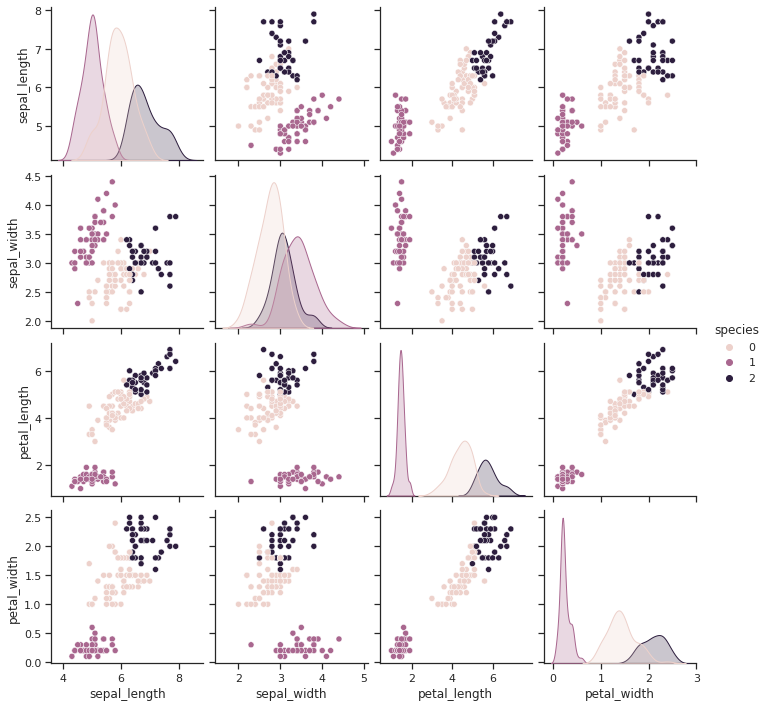

In [6]:
data_to_plot = features
data_to_plot['species'] = model.labels_
sns.set_theme(style="ticks")
sns.pairplot(data_to_plot, hue="species")
plt.show()

## Plot Dendrogram

A Dendrogram shows you the formation of the clusters. Note that you can choose the number of clusters to use using the dendrogram. For example, if you draw a horizontal line where the value on the y axis is 25, you will get two clusters.  This makes intuitive sense, as the sentosa seems to be more separable from the other two flowers.  If you draw a horizontal line where the y axies is 10, you will get 3 clusters. 

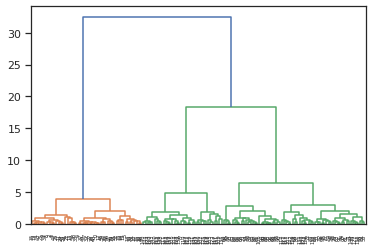

In [7]:
dend = sch.dendrogram(sch.linkage(features, method='ward'))
plt.show()

## Explore 4 Clusters

When working with data where you do not know the number of clusters in advance, you can try different number of clusters using hierarchical clustering. Even when the number of clusters are determined in advance by a third party, it may be useful to check whether changing number of clusters makes sense.

Looking at the dendrogram, it seems that 4 clusters also makes sense. So let's give it a try.

In [8]:
# Create a hierarchical model to extract 4 clusters
# The output is the cluster for each row in the data set
model1 = AgglomerativeClustering(n_clusters=4)
model1.fit_predict(features.values)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## Plot 4-Clusters Model

Since we are not botanists, we are not in the position to determine whether there should be 4 types of Iris flowers. We are just using this as an example to show how  to use clustering to discover groupings in data that is not yet well understood.

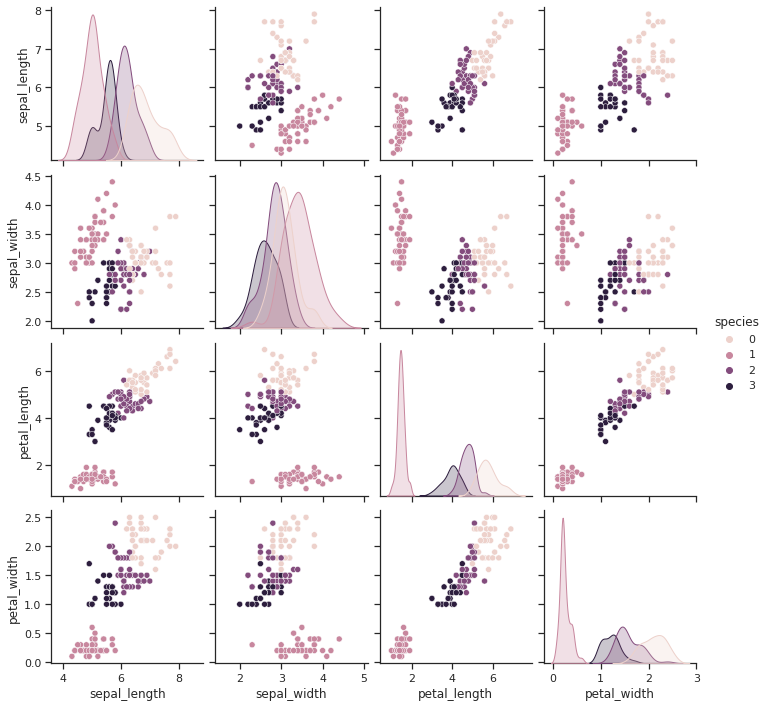

In [9]:
data_to_plot1 = features
data_to_plot1['species'] = model1.labels_
sns.pairplot(data_to_plot1, hue="species")
plt.show()

## Additional Activities

- Read more about about different [clustering](https://en.wikipedia.org/wiki/Cluster_analysis) techniques.
- What criteria would you use to determine the number of clusters there are for your data?
- Read about the machine learning model in [mono2micro](https://www.researchgate.net/publication/345751911_Mono2Micro_an_AI-based_toolchain_for_evolving_monolithic_enterprise_applications_to_a_microservice_architecture), which uses hierarchical clustering.